---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [169]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey



In [170]:
import pandas as pd

df1 = pd.DataFrame(friends_chars['CHANDLER'])
df2 = pd.DataFrame(friends_chars['JOEY'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])
df4 = pd.DataFrame(friends_chars['RACHEL'])
df5 = pd.DataFrame(friends_chars['ROSS'])
df6 = pd.DataFrame(friends_chars['MONICA'])

In [171]:
pd.options.display.max_colwidth = 100

In [172]:
df1.head()

0
0                                          You know, I'd love to, but I'm a little tired.\n
1                                                                              You're on!\n
2  He could be alone. This morning I heard him do push-ups, and then talk to his triceps.\n
3                                                       She's cheating on Joey with Ross!\n
4                                                                                    Wow!\n

In [173]:
listOfCharacters1 = [True] *df1.shape[0]
listOfCharacters2 = [False] *df2.shape[0]
listOfCharacters3 = [False] *df3.shape[0]
listOfCharacters4 = [False] *df4.shape[0]
listOfCharacters5 = [False] *df5.shape[0]
listOfCharacters6 = [False] *df6.shape[0]


In [174]:
df1['Chandler'] = listOfCharacters1
df2['Chandler'] = listOfCharacters2 
df3['Chandler'] = listOfCharacters3
df4['Chandler'] = listOfCharacters4
df5['Chandler'] = listOfCharacters5
df6['Chandler'] = listOfCharacters6


In [175]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})
df6=df6.rename(columns={0: 'Dialogue'})

In [176]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

Dialogue  \
0  (sees the chick and the duck) Oh, yeah, I’m sorry. They used to live here; sometimes they migrat...   
1                                                                               And I have costumes.\n   
2                               And she's... turning on the TV... and watching... Miss Congeniality!\n   
3                                                                               You stole the phone!\n   
4                                                                                  That’s a low one!\n   

   Chandler  
0     False  
1     False  
2      True  
3     False  
4      True

In [177]:
df.head(10)

Dialogue  \
0  (sees the chick and the duck) Oh, yeah, I’m sorry. They used to live here; sometimes they migrat...   
1                                                                               And I have costumes.\n   
2                               And she's... turning on the TV... and watching... Miss Congeniality!\n   
3                                                                               You stole the phone!\n   
4                                                                                  That’s a low one!\n   
5                                                                                             Nooo!!\n   
6  Anyway, one thing lead to another, and... oh... before you know it, we were kissing. I mean, how...   
7                                                                                  Ohh that’s sweet!\n   
8                                                I'm sorry, I think that you just misunderstood her.\n   
9                                           I was surprised to see a kangaroo in a World War I epic.\n   

   Chandler  
0     False  
1     False  
2      True  
3     False  
4      True  
5     False  
6     False  
7     False  
8     False  
9      True

In [178]:
from io import StringIO
col = [ 'Dialogue','Chandler']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Dialogue', 'Chandler']
category_id_df = df[['Dialogue', 'Chandler']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Chandler', 'Dialogue']].values)
df.head(10)


Dialogue  \
0  (sees the chick and the duck) Oh, yeah, I’m sorry. They used to live here; sometimes they migrat...   
1                                                                               And I have costumes.\n   
2                               And she's... turning on the TV... and watching... Miss Congeniality!\n   
3                                                                               You stole the phone!\n   
4                                                                                  That’s a low one!\n   
5                                                                                             Nooo!!\n   
6  Anyway, one thing lead to another, and... oh... before you know it, we were kissing. I mean, how...   
7                                                                                  Ohh that’s sweet!\n   
8                                                I'm sorry, I think that you just misunderstood her.\n   
9                                           I was surprised to see a kangaroo in a World War I epic.\n   

   Chandler  
0     False  
1     False  
2      True  
3     False  
4      True  
5     False  
6     False  
7     False  
8     False  
9      True

In [179]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [180]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

Dialogue  Chandler
0  sees chick duck oh yeah im sorry used live sometimes migrate back     False
1                                                           costumes     False
2                         shes turning tv watching miss congeniality      True
3                                                        stole phone     False
4                                                      thats low one      True

In [181]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


In [182]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 6637 unique tokens.


{'\n': 1,
 'i': 2,
 'you': 3,
 'the': 4,
 'to': 5,
 'a': 6,
 'and': 7,
 'that': 8,
 'it': 9,
 'what': 10,
 'of': 11,
 'is': 12,
 'no': 13,
 'in': 14,
 'oh': 15,
 'this': 16,
 'me': 17,
 'we': 18,
 'okay': 19,
 'so': 20,
 'just': 21,
 'not': 22,
 'have': 23,
 'do': 24,
 'my': 25,
 'with': 26,
 'was': 27,
 'on': 28,
 'he': 29,
 'know': 30,
 'well': 31,
 'for': 32,
 'all': 33,
 'yeah': 34,
 'be': 35,
 'her': 36,
 'are': 37,
 'but': 38,
 'hey': 39,
 'right': 40,
 'at': 41,
 'up': 42,
 'out': 43,
 'get': 44,
 'like': 45,
 "i'm": 46,
 'your': 47,
 'gonna': 48,
 'can': 49,
 'i’m': 50,
 'monica': 51,
 'him': 52,
 'joey': 53,
 'if': 54,
 'think': 55,
 'about': 56,
 'go': 57,
 'look': 58,
 'here': 59,
 'his': 60,
 'she': 61,
 'really': 62,
 'don’t': 63,
 "it's": 64,
 'one': 65,
 'ross': 66,
 'did': 67,
 'they': 68,
 'it’s': 69,
 "don't": 70,
 'there': 71,
 'now': 72,
 'yes': 73,
 'uh': 74,
 'see': 75,
 'why': 76,
 'mean': 77,
 'how': 78,
 'got': 79,
 'good': 80,
 'because': 81,
 'when': 82,
 "th

In [183]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (99233, 120)


array([[   0,    0,    0, ...,  349,  914,   90],
       [   0,    0,    0, ...,    0,    0, 3671],
       [   0,    0,    0, ...,  432,  519, 1966],
       ...,
       [   0,    0,    0, ...,    0,    0, 1420],
       [   0,    0,    0, ...,   57,   75,  496],
       [   0,    0,    0, ..., 1267,   15,  121]], dtype=int32)

In [184]:
Y = pd.get_dummies(df['Chandler']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(66486, 120) (66486, 2)
(32747, 120) (32747, 2)


In [186]:
X_test


array([[   0,    0,    0, ...,    0, 2212,  447],
       [   0,    0,    0, ...,    0,   15,  123],
       [   0,    0,    0, ...,    0,   48,   44],
       ...,
       [   0,    0,    0, ..., 1278,  207,  215],
       [   0,    0,    0, ...,    0, 4185,   55],
       [   0,    0,    0, ..., 1569,  515,  102]], dtype=int32)

In [187]:
Y_test


array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [117]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [118]:
X.shape[1]

120

In [76]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 68s 1ms/sample - loss: 0.4310 - accuracy: 0.8351 - val_loss: 0.4129 - val_accuracy: 0.8359
Epoch 2/10
59837/59837 [==============================] - 68s 1ms/sample - loss: 0.3823 - accuracy: 0.8520 - val_loss: 0.4013 - val_accuracy: 0.8457
Epoch 3/10
59837/59837 [==============================] - 67s 1ms/sample - loss: 0.3489 - accuracy: 0.8690 - val_loss: 0.3908 - val_accuracy: 0.8534
Epoch 4/10
59837/59837 [==============================] - 65s 1ms/sample - loss: 0.3244 - accuracy: 0.8791 - val_loss: 0.3894 - val_accuracy: 0.8580
Epoch 5/10
59837/59837 [==============================] - 66s 1ms/sample - loss: 0.3069 - accuracy: 0.8863 - val_loss: 0.3945 - val_accuracy: 0.8592
Epoch 6/10
59837/59837 [==============================] - 64s 1ms/sample - loss: 0.2928 - accuracy: 0.8909 - val_loss: 0.3931 - val_accuracy: 0.8594
Epoch 7/10
59837/59837 [==============================] -

In [155]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 167s 3ms/sample - loss: 0.4413 - accuracy: 0.8329 - val_loss: 0.4152 - val_accuracy: 0.8415
Epoch 2/10
59837/59837 [==============================] - 172s 3ms/sample - loss: 0.3955 - accuracy: 0.8473 - val_loss: 0.3956 - val_accuracy: 0.8505
Epoch 3/10
59837/59837 [==============================] - 168s 3ms/sample - loss: 0.3616 - accuracy: 0.8665 - val_loss: 0.3875 - val_accuracy: 0.8582
Epoch 4/10
59837/59837 [==============================] - 172s 3ms/sample - loss: 0.3344 - accuracy: 0.8784 - val_loss: 0.3809 - val_accuracy: 0.8639
Epoch 5/10
59837/59837 [==============================] - 169s 3ms/sample - loss: 0.3090 - accuracy: 0.8874 - val_loss: 0.3884 - val_accuracy: 0.8622
Epoch 6/10
59837/59837 [==============================] - 172s 3ms/sample - loss: 0.2884 - accuracy: 0.8953 - val_loss: 0.3803 - val_accuracy: 0.8704
Epoch 7/10
59837/59837 [===========================

In [160]:
accr = model2.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32747/32747 [==============================] - 58s 2ms/sample - loss: 0.3755 - accuracy: 0.8758
Test set
  Loss: 0.375
  Accuracy: 0.876


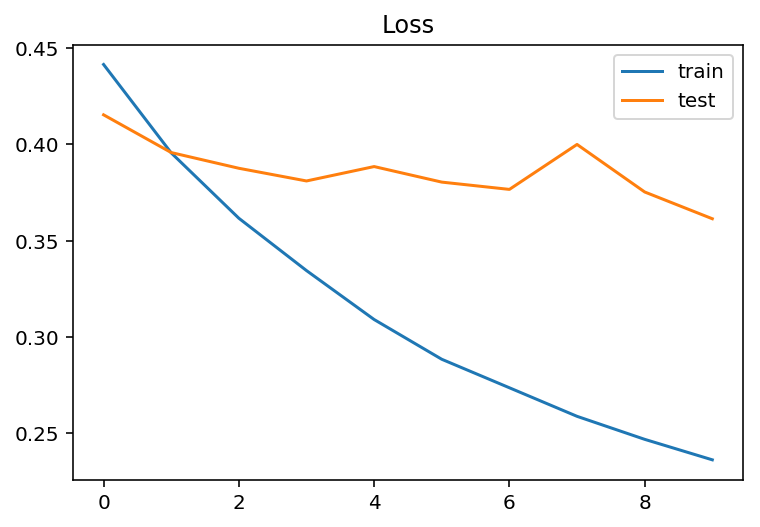

In [161]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [162]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[0.49354455, 0.50645554],
       [0.37282005, 0.6271799 ],
       [0.9901544 , 0.00984554],
       ...,
       [0.00302847, 0.9969715 ],
       [0.8955831 , 0.10441696],
       [0.8802191 , 0.11978085]], dtype=float32)

In [189]:
Y_test


array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [164]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[1 1 0 ... 1 0 0]


In [165]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 0 0 ... 0 1 0]


In [166]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)



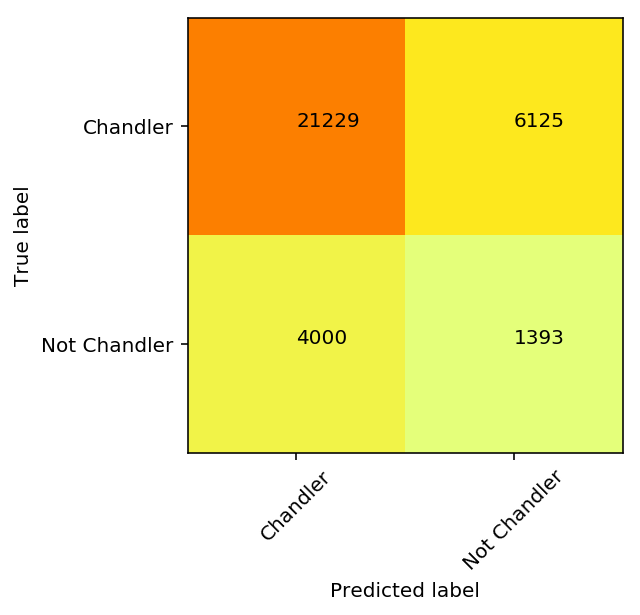

In [167]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Chandler','Not Chandler']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(conf_mat[i][j]))
plt.show()

In [168]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Chandler', 'Not Chandler']
print(classification_report(y_true, y_pred, target_names=target_names))
     

              precision    recall  f1-score   support

    Chandler       0.84      0.78      0.81     27354
Not Chandler       0.19      0.26      0.22      5393

    accuracy                           0.69     32747
   macro avg       0.51      0.52      0.51     32747
weighted avg       0.73      0.69      0.71     32747



In [190]:
Y_train = np.array(Y_train)
Y_train = np.argmax(Y_train, axis=-1)    
print(Y_train)

[0 0 0 ... 0 0 0]


In [191]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
#print(clf.predict(X[2:3]))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [192]:
y_pred1=clf.predict(X_test)

In [194]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 1 0 ... 0 0 0]


In [195]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Chandler', 'Not Chandler']
print(classification_report(y_true, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

    Chandler       0.84      1.00      0.91     27460
Not Chandler       0.25      0.00      0.00      5287

    accuracy                           0.84     32747
   macro avg       0.54      0.50      0.46     32747
weighted avg       0.74      0.84      0.77     32747

